In [1]:
import transformer_utils as tu

In [2]:
import torch
from torchvision.datasets import MNIST
from torchvision.transforms import ToTensor
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

In [3]:
#Assume MNIST available in the root folder
train_data = MNIST(root="training data", train=True, download=True, transform=ToTensor())
print ("training data shape:", train_data.data.shape)

train_ratio = 0.90
split_idx = int(train_ratio *len(train_data))

test_data = MNIST(root="training data", train=False, download=True, transform=ToTensor())
train_data, valid_data = torch.utils.data.random_split(train_data,[split_idx, len(train_data)-split_idx]);
print(f'Number of tr, val, test examples: {len(train_data), len(valid_data), len(test_data)}')

training data shape: torch.Size([60000, 28, 28])
Number of tr, val, test examples: (54000, 6000, 10000)


In [4]:
model = tu.VisionTransformer(H=28, P=7, Cin=1, d=48, nh=4, L=2, dpo=0.1, num_classes=10).to(device)
optimizer = torch.optim.Adam(model.parameters())
criterion = torch.nn.CrossEntropyLoss()
num_batches = 64
num_epochs = 10

  0%|          | 0/10 [00:00<?, ?it/s]

Training:   0%|          | 0/843 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/94 [00:00<?, ?it/s]

Training:   0%|          | 0/843 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/94 [00:00<?, ?it/s]

Training:   0%|          | 0/843 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/94 [00:00<?, ?it/s]

Training:   0%|          | 0/843 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/94 [00:00<?, ?it/s]

Training:   0%|          | 0/843 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/94 [00:00<?, ?it/s]

Training:   0%|          | 0/843 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/94 [00:00<?, ?it/s]

Training:   0%|          | 0/843 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/94 [00:00<?, ?it/s]

Training:   0%|          | 0/843 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/94 [00:00<?, ?it/s]

Training:   0%|          | 0/843 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/94 [00:00<?, ?it/s]

Training:   0%|          | 0/843 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/94 [00:00<?, ?it/s]

Epoch: 10 | Epoch Time: 0m 12s
	Train Loss: 0.118 | Train Acc: 96.19%
	 Val. Loss: 0.069 |  Val. Acc: 97.86%


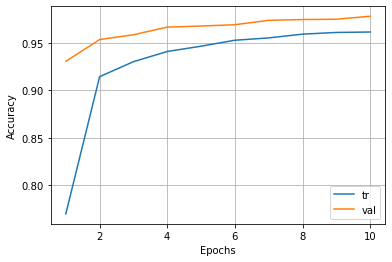

In [5]:
trained_params = tu.trainval_epochs(model,train_data, valid_data, num_batches, num_epochs, optimizer, criterion,plot='acc')

In [6]:
model.load_state_dict(trained_params)
test_loss, test_acc = tu.evaluate(model, test_data, num_batches, criterion)
print(f'Test Loss: {test_loss:.3f} | Test Acc: {test_acc*100:.2f}%')

Evaluating:   0%|          | 0/157 [00:00<?, ?it/s]

Test Loss: 0.061 | Test Acc: 98.13%
